In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Unzip the  dataset
 !unzip "/content/drive/My Drive/AI_Data/Data_Cars and Trucks.zip"

Archive:  /content/drive/My Drive/AI_Data/Data_Cars and Trucks.zip
   creating: Datasets/
  inflating: Datasets/.DS_Store      
   creating: Datasets/car/
 extracting: Datasets/car/100171.jpg  
 extracting: Datasets/car/102685.jpg  
 extracting: Datasets/car/103773.jpg  
  inflating: Datasets/car/111104.jpg  
  inflating: Datasets/car/115988.jpg  
 extracting: Datasets/car/119092.jpg  
 extracting: Datasets/car/128887.jpg  
 extracting: Datasets/car/130726.jpg  
  inflating: Datasets/car/13193.jpg  
 extracting: Datasets/car/137920.jpg  
  inflating: Datasets/car/139345.jpg  
 extracting: Datasets/car/141101.jpg  
 extracting: Datasets/car/143302.jpg  
  inflating: Datasets/car/145185.jpg  
  inflating: Datasets/car/145195.jpg  
 extracting: Datasets/car/145512.jpg  
  inflating: Datasets/car/146072.jpg  
  inflating: Datasets/car/153019.jpg  
  inflating: Datasets/car/155229.jpg  
  inflating: Datasets/car/155509.jpg  
 extracting: Datasets/car/155828.jpg  
 extracting: Datasets/car/1

Using TensorFlow backend.


Copying files: 789 files [00:00, 3681.94 files/s]


Found 630 images belonging to 2 classes.
Found 158 images belonging to 2 classes.













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
20/19 [==============================] - 11s 571ms/step - loss: 1.0936 - acc: 0.5552 - val_loss: 0.9150 - val_acc: 0.6000
Epoch 2/100
20/19 [==============================] - 10s 480ms/step - loss: 0.8919 - acc: 0.5422 - val_loss: 0.7415 - val_acc: 0.5579
Epoch 3/100
20/19 [==============================] - 10s 480ms/step - loss: 0.7337 - acc: 0.5813 - val_loss: 0.6619 - val_acc: 0.5947
Epoch 4/100
20/19 [==============================] - 10s 485ms/step - loss: 0.6700 - acc: 0.6075 - val_loss: 0.6558 - val_acc: 0.5947
Epoch 5/100
20/19 [==============================] - 10s 478ms/step - loss: 0.6421 - acc: 0.6443 - val_loss: 0.6689 - val_acc: 0.5798
Epoch 6/100
20/19 [===

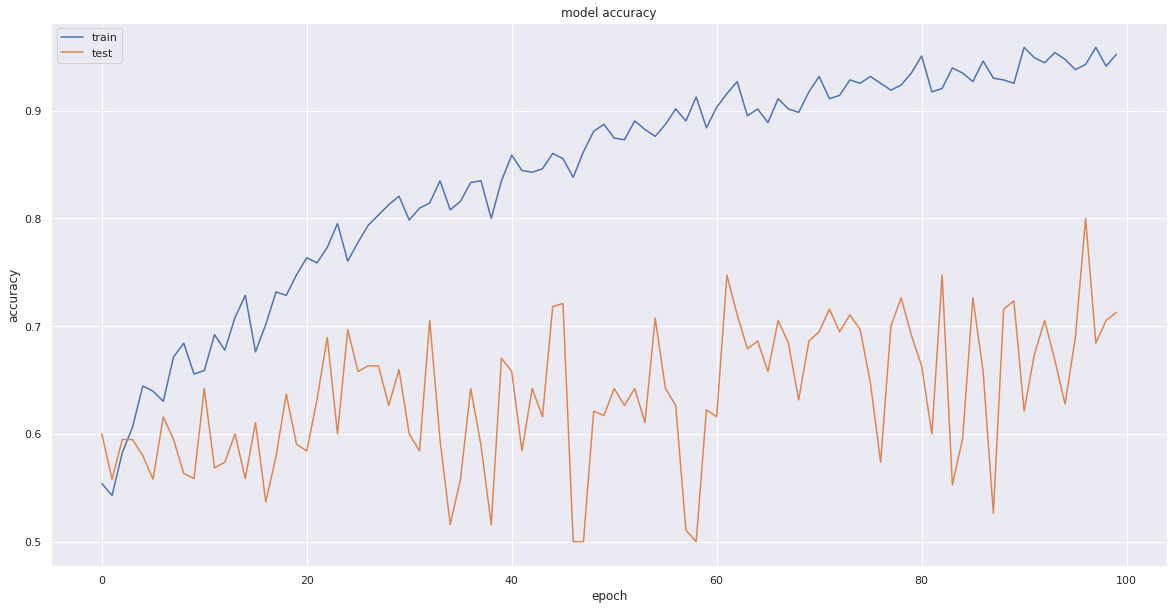

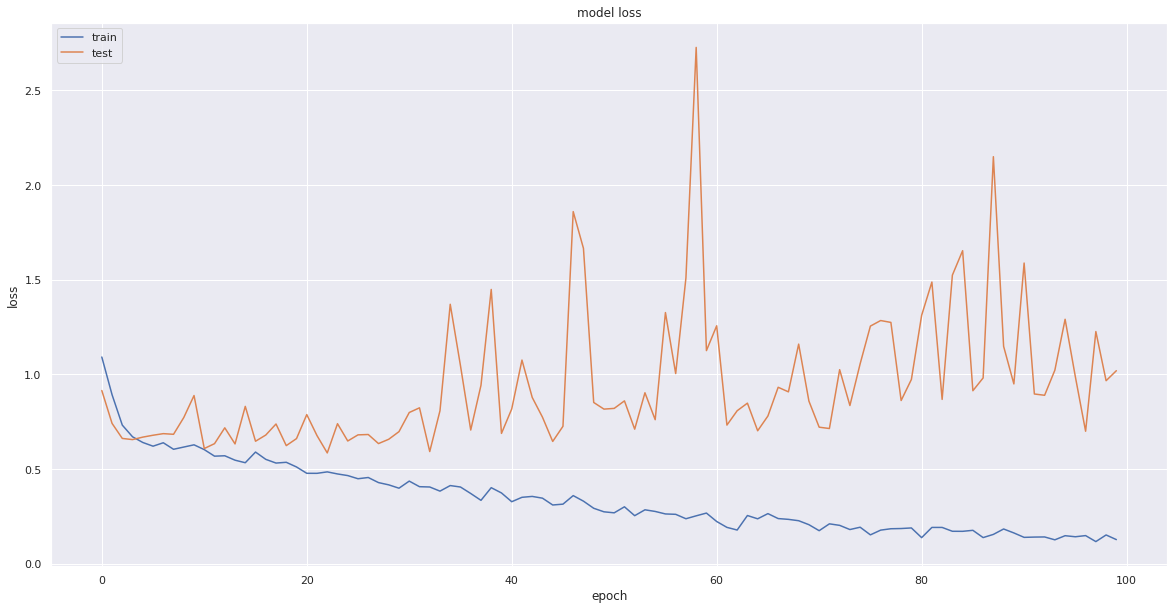

In [3]:
#Model : 1
!pip install split_folders tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
 


# split Dataset folder into train and val folders
import split_folders
split_folders.ratio('/content/Datasets', output="data", seed=1337, ratio=(.8, .2))


'''Note: delete image 181355.jpg from train folder since it is corrupted'''

def create_model(p,input_shape):
    # Initialising the CNN
    model = Sequential()
    # Convolution + Pooling Layer 
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
   
    # Convolution + Pooling Layer 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
   
    # Convolution + Pooling Layer 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Convolution + Pooling Layer 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flattening
    model.add(Flatten())
    
    # Fully connection
    model.add(Dropout(p))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(p/2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compiling the CNN
    optimizer = Adam(lr=1e-3)
    metrics=['accuracy']
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=metrics)
    return model


# Train the model with  ImageDataGenerator (data augmentation)

bs = 32       # batch_size- Higer the value less time for training  
epochs = 100  #given the batch size, 100 epochs is optimum
height = 64   #image dimensions
width = 64

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/data/train',
                                             target_size = (height, width),
                                             batch_size = bs,
                                             class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/data/val',
                                        target_size = (height, width),
                                        batch_size = bs,
                                        class_mode = 'binary')


model = create_model(p=0.5,input_shape=(height, width,3))                                

# store model metrics

History = model.fit_generator(training_set,
                     steps_per_epoch=627/bs,
                     epochs = epochs,
                     validation_data = test_set,
                     validation_steps = 161/bs)


# Model metrics visualization 

plt.figure(figsize = (20,10))

# summarize history for accuracy
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure(figsize = (20,10))

# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#save model
model.save('model.h5')

In [0]:
from keras.models import load_model
import cv2
import numpy as np

# Make predictions


def predict(model_path,img_path ):
  #load model
  model = load_model(model_path)

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  img = cv2.imread(img_path)
  img = cv2.resize(img,(64,64),interpolation=cv2.INTER_LINEAR)
  img = np.reshape(img,[1,64,64,3])

  classes = model.predict_classes(img)
  if classes[0][0] == 0:
      prediction = 'car'
  else:
      prediction = 'truck'

  #visualize output 
  plt.figure(figsize = (20,10))
  im = cv2.imread(img_path)
  im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
  plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
  plt.title(prediction)
  plt.show()



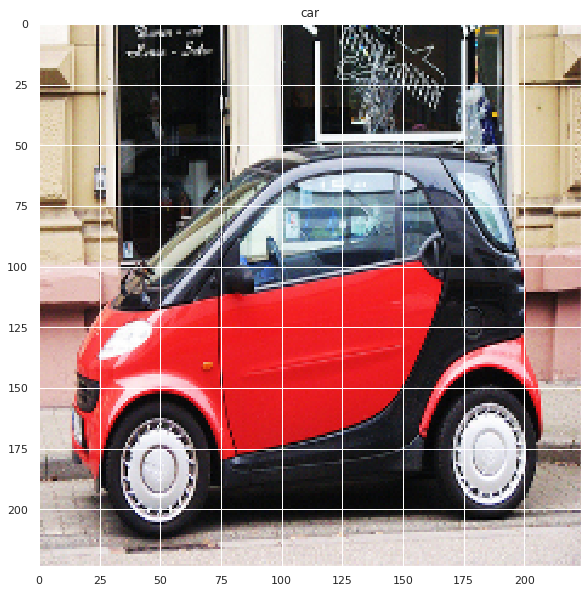

In [10]:
img_path = '/content/data/val/car/13193.jpg'
model_path = '/content/model.h5'

predict(model_path,img_path )